In [1]:
%run ../utils.ipynb

In [2]:
# 1
d_1 = M_(4.82, 0.01, 'мм')
L_1 = M_(132.8, 0.1, 'см')
D_1 = M_(11.07, 0.01, 'см')

# 2
l_weight_2 = M_(4.06, 0.01, 'см') # [cm] длина груза
l_off_2 = M_(4.78, 0.01, 'см') # [cm] от оси до края центрального груза
L_2 = M_(173, 0.2, 'см') # [cm] длина стального стержня
d_2 = M_(1.05, 0.01, 'мм') # [mm] диаметр стержня
m_2 = M_(204.5, 0.5, 'г') # [g] масса одного груза

g = M_(9.81, 0.01, 'м/с^2')

In [3]:
df = pd.read_excel("data.ods", engine="odf")
l_2 = M_(df['l, см'].dropna().to_numpy(), 0.1, 'см') + l_off_2 + l_weight_2/2
T_2 = df[['T1, с','T2, с','T3, с']].dropna().to_numpy()
T_2 = M_(T_2.mean(axis=1), np.sqrt(T_2.std(axis=1)**2 + 0.01**2), 'с') / 10
m_1 = M_(df['m, г'].dropna().to_numpy(), 0.5, 'г')
dl_1 = df[['dl1, см','dl2, см','dl3, см']].dropna().to_numpy()
dl_1 = M_(dl_1.mean(axis=1), np.sqrt(dl_1.std(axis=1)**2 + 0.1**2), 'см')
l_2
T_2

Magnitude,[5.228+/-0.0017320508075689212 4.488333333333332+/-0.0019720265943665278 3.763333333333333+/-0.0019720265943665278 3.0733333333333333+/-0.0011055415967850932 2.4483333333333333+/-0.0013743685418725398]
Units,с


In [13]:
df

,"l, см","T1, с","T2, с","T3, с","m, г","dl1, см","dl2, см","dl3, см"
0,12.0,52.26,52.29,52.29,200,4.40,5.0,4.5
1,9.0,44.90,44.86,44.89,400,8.50,8.7,9.1
2,6.0,37.61,37.65,37.64,500,11.60,11.4,12.0
3,3.0,30.74,30.73,30.73,600,13.50,14.8,13.8
4,0.0,24.49,24.47,24.49,700,16.60,16.6,16.9
5,NaN,NaN,NaN,NaN,800,18.40,18.5,18.3
6,NaN,NaN,NaN,NaN,700,16.70,16.5,16.5
7,NaN,NaN,NaN,NaN,600,14.45,13.5,13.9
8,NaN,NaN,NaN,NaN,500,11.20,11.3,11.5
9,NaN,NaN,NaN,NaN,400,9.20,8.5,9.5


In [28]:
df1 = df[df.columns[:4]].dropna().to_numpy()
df2 = df[df.columns[4:]].to_numpy()
df2

array([[200.  ,   4.4 ,   5.  ,   4.5 ],
       [400.  ,   8.5 ,   8.7 ,   9.1 ],
       [500.  ,  11.6 ,  11.4 ,  12.  ],
       [600.  ,  13.5 ,  14.8 ,  13.8 ],
       [700.  ,  16.6 ,  16.6 ,  16.9 ],
       [800.  ,  18.4 ,  18.5 ,  18.3 ],
       [700.  ,  16.7 ,  16.5 ,  16.5 ],
       [600.  ,  14.45,  13.5 ,  13.9 ],
       [500.  ,  11.2 ,  11.3 ,  11.5 ],
       [400.  ,   9.2 ,   8.5 ,   9.5 ],
       [200.  ,   4.  ,   3.9 ,   5.  ]])

In [29]:
# save()

In [5]:
M_1 = (m_1 * g * D_1 / 2).to('м*Н')
M_1

Magnitude,[0.1085967+/-0.0003091696465018236 0.2171934+/-0.0004015223160897319 0.27149175000000003+/-0.00045874382319336196 0.3257901+/-0.000520202528173463 0.38008845+/-0.0005845635083701877 0.4343868+/-0.0006509664893971598 0.38008845+/-0.0005845635083701877 0.3257901+/-0.000520202528173463 0.27149175000000003+/-0.00045874382319336196 0.2171934+/-0.0004015223160897319 0.1085967+/-0.0003091696465018236]
Units,Н м


In [6]:
phi_1 = unp.arctan(dl_1/2/L_1)*u.rad
phi_1

/nix/store/nrixknxpg35wdd9c4iw8x1b0jq53h6i5-python3-3.11.5-env/lib/python3.11/site-packages/numpy/lib/function_base.py:2410: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  inputs = [asanyarray(a, dtype=object) for a in args]


Magnitude,[0.017443009839265652+/-0.0010572585558553788 0.032995049286529875+/-0.0010110332730319737 0.04389748440189275+/-0.001010420453761624 0.05278726019452237+/-0.0021205910668895913 0.0627938422077069+/-0.0006512693114114787 0.06916659886315253+/-0.0004865235401301511 0.062293795346454295+/-0.000517571644931699 0.052474373477149734+/-0.0015101981313188934 0.04264481290996873+/-0.0006016480695698257 0.034123295632560245+/-0.0016201590872234849 0.016188344768492586+/-0.001907004496736306]
Units,radian


/nix/store/nrixknxpg35wdd9c4iw8x1b0jq53h6i5-python3-3.11.5-env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3488: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asarray(x, dtype=object)
/nix/store/nrixknxpg35wdd9c4iw8x1b0jq53h6i5-python3-3.11.5-env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3490: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y = np.asarray(y, dtype=object)
/nix/store/nrixknxpg35wdd9c4iw8x1b0jq53h6i5-python3-3.11.5-env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:3529: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(err, dtype=object)


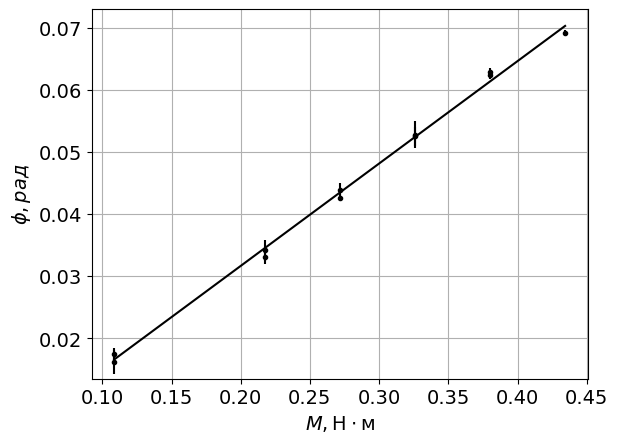

In [7]:
_x = M_1
_y = phi_1
k1, b1 = polyfit(_x, _y)
_xx = minmax(_x)
errorbar(_x, _y)
plt.ylabel("$\phi, рад$")
# plt.ylabel(f"$\phi, {plt.gca().yaxis.get_units():L}$")
plt.xlabel(f"$M, {plt.gca().xaxis.get_units():L}$")
plt.plot(_xx, _xx * k1.value + b1.value, 'k')
plt.savefig("1plot.svg")
k1 = k1.to('1/м/Н')

In [8]:
f1 = 1/k1
f1

<Measurement(6.0681539709105845, 0.13768301204859534, Н * м)>

In [9]:
G1 = (L_1 * f1 / np.pi / (d_1/2)**4).to('ГПа')
G1

<Measurement(76.03903977024576, 1.8379550229962962, ГПа)>

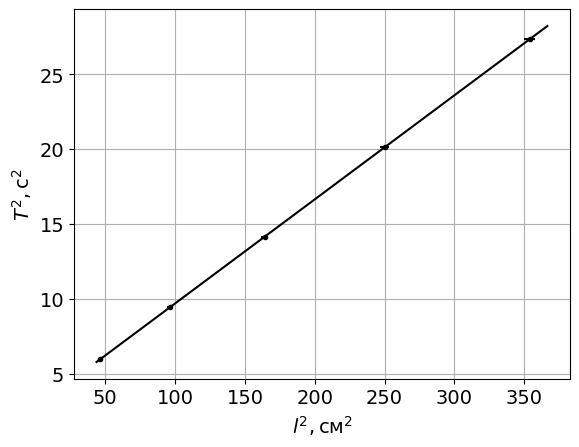

In [10]:
_x = l_2*l_2
_y = T_2*T_2
errorbar(_x, _y)
k2, b2 = polyfit(_x, _y)
# _x = np.array([min(_x).n * 0.95, max(_x).n * 1.05])
_xx = minmax(_x) * 1.05 - 5*u.см**2
plt.xlabel(f"$l^2, {plt.gca().xaxis.get_units():L}$")
plt.ylabel(f"$T^2, {plt.gca().yaxis.get_units():L}$")
plt.plot(_xx, _xx * k2.value + b2.value, 'k')
plt.savefig("2plot.svg")

In [11]:
f2 = ((2 * np.pi)**2 / k2 * m_2).to('Н*м')
G2 = (2 * L_2 * f2 / np.pi / (d_2/2)**4).to('ГПа') / 2
G2

<Measurement(84.28004636452387, 3.2193344497769614, ГПа)>

In [12]:
save()